# Problem 5 Clustering and dimensionality reduction

In this analysis, we examine the chemical properties of 6,500 bottles of Vinho Verde wine from northern Portugal to see if they can naturally distinguish between red and white wines and differentiate quality levels. Using PCA, t-SNE, and K-Means clustering, we explore whether these unsupervised techniques can reveal patterns in the data that align with wine color and quality, providing numerical and visual evidence to support our findings.

## TSNE

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import plotly.express as px
import plotly.io as pio

wine_df = pd.read_csv('wine.csv')
features = wine_df.columns[:-2]
scaler = StandardScaler()
scaled_wine_df = scaler.fit_transform(wine_df[features])

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_wine_df)

tsne_df = pd.DataFrame(data=tsne_results, columns=['Dim1', 'Dim2'])
tsne_df['Color'] = wine_df['color']

pio.renderers.default = 'png'

fig_tsne_color = px.scatter(tsne_df, x='Dim1', y='Dim2', color='Color', title='t-SNE: Wine Color')
fig_tsne_color.show()


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


The t-SNE plot illustrates how well the wines can be grouped into red and white categories. The t-SNE plot reveals well-defined clusters for red and white wines, with some sub-clusters potentially indicating different quality levels. However, there is some overlap in areas where red and white wines share similar chemical profiles. t-SNE effectively separates the wine colors, suggesting that local relationships between chemical properties are key in distinguishing wine types.

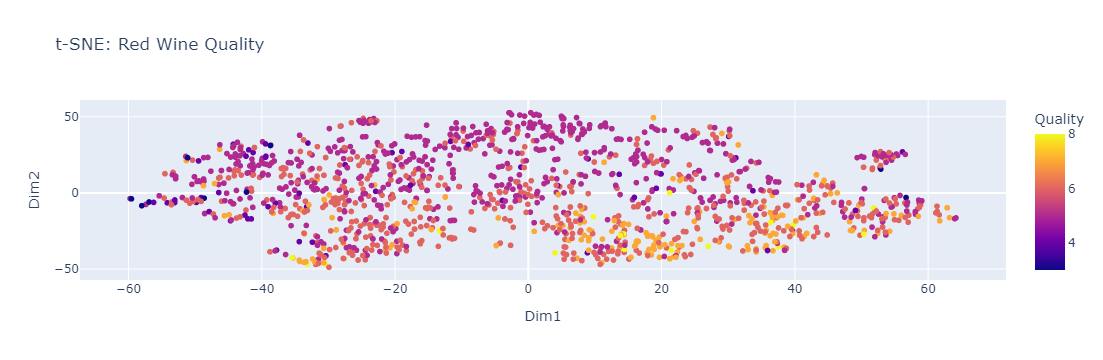

In [111]:
#Separate the dataset into red 
red_wine_df = wine_df[wine_df['color'] == 'red']
scaled_red_wine = scaler.fit_transform(red_wine_df[features])

#Perform t-SNE 
tsne_red = TSNE(n_components=2, random_state=42)
tsne_results_red = tsne_red.fit_transform(scaled_red_wine)

tsne_df_red = pd.DataFrame(data=tsne_results_red, columns=['Dim1', 'Dim2'])
tsne_df_red['Quality'] = red_wine_df['quality']

# Visualize t-SNE results by wine quality for red wines
fig_tsne_red_quality = px.scatter(tsne_df_red, x='Dim1', y='Dim2', color='Quality', title='t-SNE: Red Wine Quality')
fig_tsne_red_quality.show()

white_wine_df = wine_df[wine_df['color'] == 'white']
white_wine_df_clean = white_wine_df.dropna()
features = white_wine_df_clean.columns[:-2]
scaler = StandardScaler()
scaled_white_wine_clean = scaler.fit_transform(white_wine_df_clean[features])

# Perform t-SNE on the cleaned white wine data
tsne_white_clean = TSNE(n_components=2, random_state=42)
tsne_results_white_clean = tsne_white_clean.fit_transform(scaled_white_wine_clean)
tsne_df_white_clean = pd.DataFrame(data=tsne_results_white_clean, columns=['Dim1', 'Dim2'])
tsne_df_white_clean['Quality'] = white_wine_df_clean['quality'].values

# Visualize t-SNE results by wine quality for cleaned white wines
fig_tsne_white_quality_clean = px.scatter(tsne_df_white_clean, x='Dim1', y='Dim2', color='Quality', title='t-SNE: White Wine Quality (Cleaned Data)')
fig_tsne_white_quality_clean.show()


To further analyze the subclusters, we applied t-SNE separately on red and white wines based on their quality ratings. The overlap observed in the plots suggests that wine quality is subjective, which is expected given that the ratings were provided by a panel of individuals. Despite this, certain patterns emerge: for instance, in red wine, the bottom right quadrant shows a concentration of higher quality ratings, indicated by a stronger presence of yellow. In white wine, higher quality ratings tend to cluster more centrally and towards the left.

## PCA

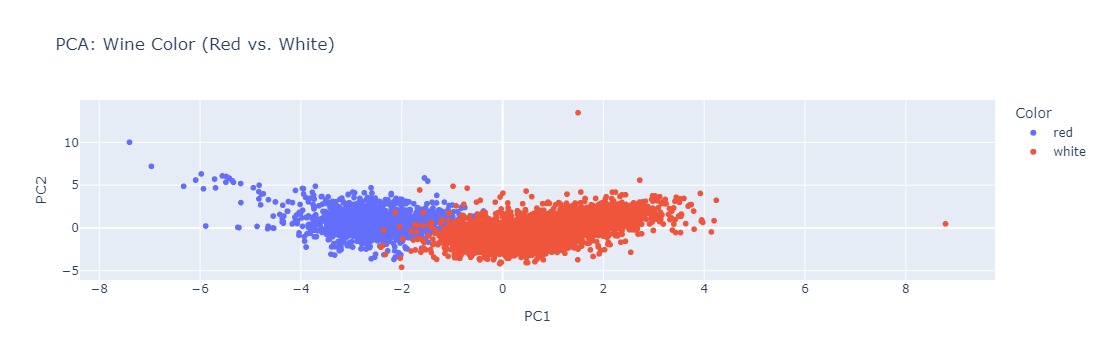

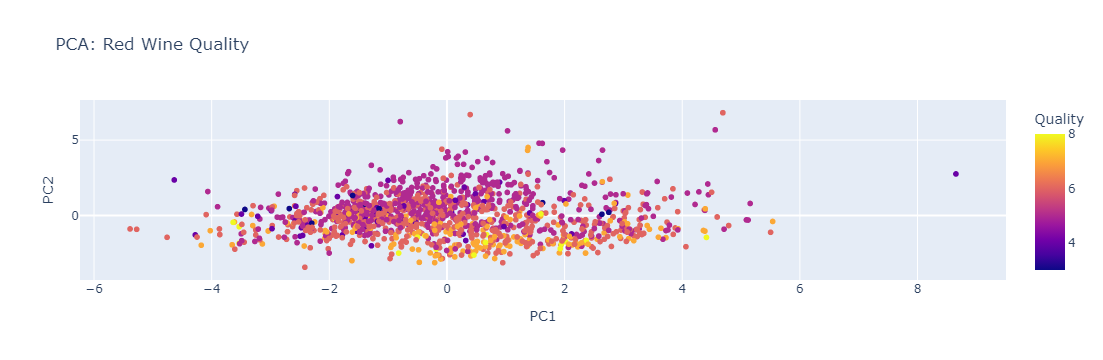

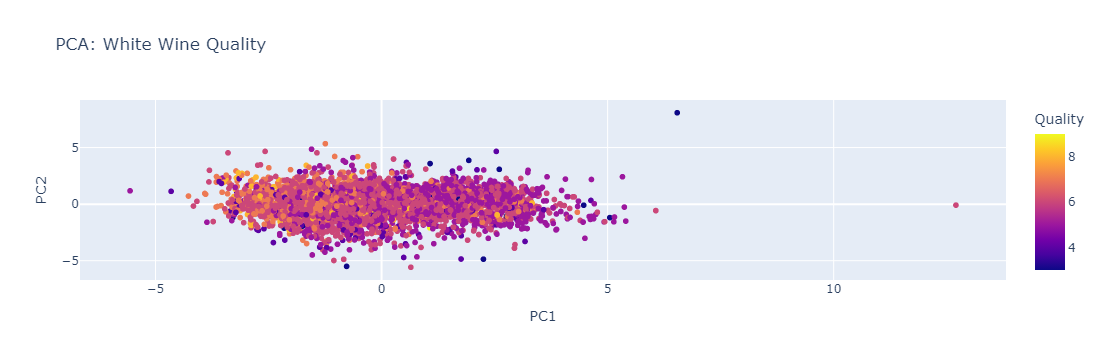

In [114]:
wine_df = pd.read_csv('wine.csv')
red_wine_df = wine_df[wine_df['color'] == 'red']
white_wine_df = wine_df[wine_df['color'] == 'white']
red_wine_df_clean = red_wine_df.dropna()
white_wine_df_clean = white_wine_df.dropna()

#Standardize the data for both red and white wines
scaler = StandardScaler()
scaled_red_wine_clean = scaler.fit_transform(red_wine_df_clean[red_wine_df_clean.columns[:-2]])
scaled_white_wine_clean = scaler.fit_transform(white_wine_df_clean[white_wine_df_clean.columns[:-2]])
combined_wine_df_clean = pd.concat([red_wine_df_clean, white_wine_df_clean])
scaled_combined_wine_clean = scaler.fit_transform(combined_wine_df_clean[combined_wine_df_clean.columns[:-2]])

#Perform PCA for Wine Color (Red vs. White)
pca_color = PCA(n_components=2)
pca_results_color = pca_color.fit_transform(scaled_combined_wine_clean)

#Perform PCA for Red Wine Quality
pca_red = PCA(n_components=2)
pca_results_red = pca_red.fit_transform(scaled_red_wine_clean)

#Perform PCA for White Wine Quality
pca_white = PCA(n_components=2)
pca_results_white = pca_white.fit_transform(scaled_white_wine_clean)


pca_df_color = pd.DataFrame(data=pca_results_color, columns=['PC1', 'PC2'])
pca_df_color['Color'] = combined_wine_df_clean['color'].values
pca_df_red = pd.DataFrame(data=pca_results_red, columns=['PC1', 'PC2'])
pca_df_red['Quality'] = red_wine_df_clean['quality'].values
pca_df_white = pd.DataFrame(data=pca_results_white, columns=['PC1', 'PC2'])
pca_df_white['Quality'] = white_wine_df_clean['quality'].values


fig_pca_color = px.scatter(pca_df_color, x='PC1', y='PC2', color='Color', title='PCA: Wine Color (Red vs. White)')
fig_pca_color.show()
fig_pca_red_quality = px.scatter(pca_df_red, x='PC1', y='PC2', color='Quality', title='PCA: Red Wine Quality')
fig_pca_red_quality.show()
fig_pca_white_quality = px.scatter(pca_df_white, x='PC1', y='PC2', color='Quality', title='PCA: White Wine Quality')
fig_pca_white_quality.show()


The first PCA plot illustrates the separation of wines into red and white categories based on the first two principal components. It shows a clear distinction between red and white wines, with some overlap between the clusters. The first principal component captures most of the variance, indicating a strong relationship with wine color. This distinct grouping suggests that the chemical properties are effective in differentiating between red and white wines, with PCA capturing the key differences in the initial components.

A similar PCA analysis was conducted for wine quality, as we did with t-SNE. However, neither approach produced distinct clusters based on quality. Notably, the clusters for red wine quality are more separated than those for white wine quality.

## K-Means Clustering wth PCA

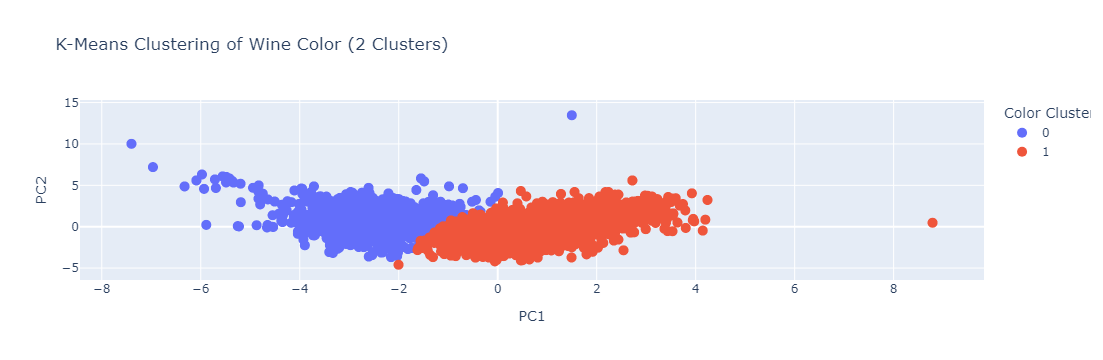

In [123]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px

wine_df_clean = wine_df.dropna()
wine_df_clean = wine_df_clean.drop(columns=['quality'])
scaler = StandardScaler()
scaled_wine = scaler.fit_transform(wine_df_clean[wine_df_clean.columns[:-1]])
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_wine)


n_clusters = 2 #since we need to seperate between red and white
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
wine_df_clean['Color Cluster'] = kmeans.fit_predict(scaled_wine)
fig = px.scatter(x=pca_results[:, 0], y=pca_results[:, 1], 
                 color=wine_df_clean['Color Cluster'].astype(str),
                 title=f'K-Means Clustering of Wine Color ({n_clusters} Clusters)',
                 labels={'x': 'PC1', 'y': 'PC2', 'color': 'Color Cluster'})
fig.update_traces(marker=dict(size=10))
fig.show()

We used PCA before applying K-Means clustering to reduce the dataset's dimensionality, ensuring that the input features were uncorrelated and more manageable for the algorithm. This approach improved the clustering accuracy by focusing on the most significant components of the data, leading to clearer separation of wines into red and white categories.

This plot shows the clusters formed by K-Means based on wine color, revealing how chemical properties group wines into red and white categories. The clusters mostly align with the expected colors, with clear separation between red and white wines, though some overlap occurs at the boundaries where similar chemical profiles blur the distinction. This clustering confirms that the chemical properties effectively differentiate wine color, with most of the variance in the dataset linked to this key characteristic.

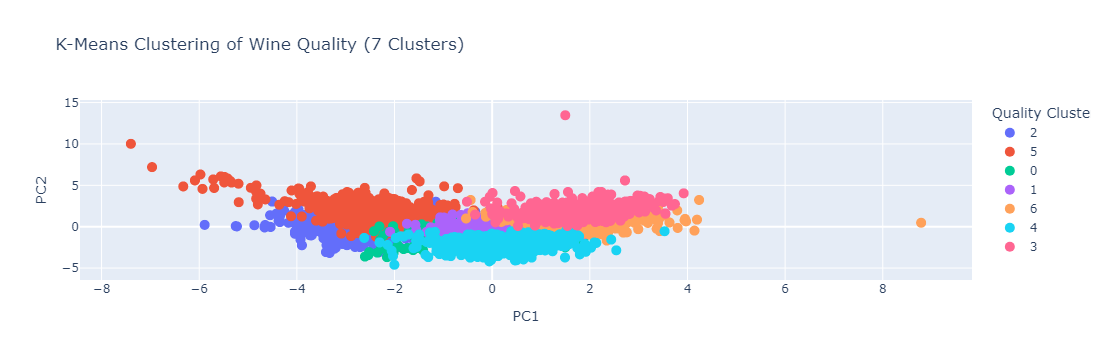

In [121]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px


wine_df_clean = wine_df.dropna()
scaler = StandardScaler()
scaled_wine = scaler.fit_transform(wine_df_clean[wine_df_clean.columns[:-2]])
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_wine)
n_clusters = 7

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
wine_df_clean['Quality Cluster'] = kmeans.fit_predict(scaled_wine)
fig = px.scatter(x=pca_results[:, 0], y=pca_results[:, 1], 
                 color=wine_df_clean['Quality Cluster'].astype(str),
                 title=f'K-Means Clustering of Wine Quality ({n_clusters} Clusters)',
                 labels={'x': 'PC1', 'y': 'PC2', 'color': 'Quality Cluster'})
fig.update_traces(marker=dict(size=10))
fig.show()
